## Section 1: Stock Open Price Prediction

## Section 2: Project Definition

### Goal
Predict the Open Price of singtel stock (Z74.SI) in SGX.

### Dataset

https://sg.finance.yahoo.com/quote/Z74.SI/history?p=Z74.SI

The data is obtained from Yahoo Fiancial. It inlcudes for following infomation. % years Data.

***Open*** - Open value of the stock   
***High*** - Highest value for the stock on that day   
***Low*** - Lowest value of the stock for the day  
***Close*** - Closing place of the stock on the day   
***Adj Close*** - Adjusted closing price amends a stock's closing price to accurately reflect that stock's value after accounting for any corporate actions   
***Volume*** - Volume of stock trade on that day    
***Date*** - Date of the data collected dd/MM/yyyy format   



### Tasks

Tasks to be perform.
 
1. In import, check for completeness of data and data cleasing/repair if needed.
2. Perform some exploration on the dataset.
3. Check the correlation of data and select the feature as input.
4. Select the model to use and determine the paramters and design.
2. Shuffle and split into train and test set
3. Train a model.
4. Interpret the graph and metric (such as rmse) and analyse the performance of model.
5. Suggest possible improvements.

### Libraries

Uses package from core python, numpy, pandas, matplotlib , sklearn and keras


***1) Import all the dependencies needed for this project***

In [1]:
from datetime import datetime

## numpy
import numpy as np
from numpy import sqrt
from numpy import concatenate

## pandas
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

## matplotlib
import matplotlib.pyplot as plt

## sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## keras
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

## misc
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from IPython.display import display

%matplotlib inline

In [2]:
## Section 3: Data Engineering


***Import the data set from csv and preview the data info***

In [3]:
data = pd.read_csv("Z74.SI.5YR.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1253 non-null   object 
 1   Open       1253 non-null   float64
 2   High       1253 non-null   float64
 3   Low        1253 non-null   float64
 4   Close      1253 non-null   float64
 5   Adj Close  1253 non-null   float64
 6   Volume     1253 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.6+ KB


In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,28/8/2014,3.91,3.94,3.90,3.91,3.013353,11606000
1,29/8/2014,3.89,3.89,3.87,3.89,2.997940,11875000
2,1/9/2014,3.89,3.90,3.86,3.87,2.982526,6806000
3,2/9/2014,3.89,3.94,3.88,3.94,3.036473,10578000
4,3/9/2014,3.95,3.97,3.92,3.93,3.028767,10645000


### Data Cleasing

In [6]:
empty = data[data.isna().any(axis=1)].copy()

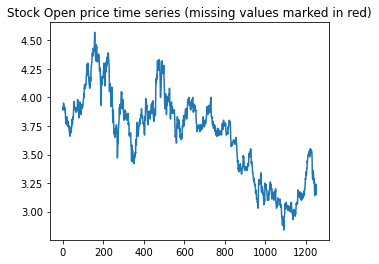

In [7]:
fig, ax = plt.subplots(figsize=(5, 4))

ax.plot(data['Open'])

# mark the rows that are NaN
ax.scatter(empty.index, empty['Open'], marker='x', color='red')

ax.set_title('Stock Open price time series (missing values marked in red)')

plt.show()

#Can redo for all columns

In [8]:
# Check any null value
# Get all the column except the date column
check_columns = list(data.columns.values[1:])

# iterate thr to check any columns with missing value
for col in check_columns:
    if data[col].isnull().values.any():
        print("Column " , col , " with missing value");
        ## Replace missing value with median value. 
        median = data[col].median()
        data[col].fillna(median, inplace=True)
        

### Data Exploration

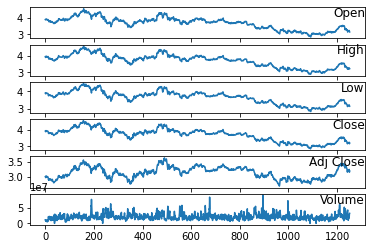

In [9]:
values = data.values
# specify columns to plot
groups = [ 1, 2, 3, 4, 5 , 6 ]
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(data.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

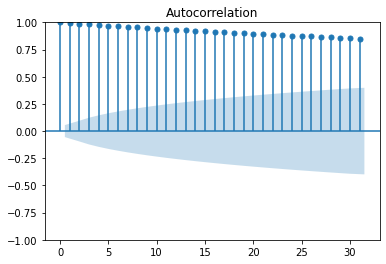

In [10]:
plot_acf(data['Open'])
plt.show()

Open price is correlated to > 30 lags (Day)

### Imbalance / Data Sampling

The target of this project is not a classification prediction. Therefore does not check for inbalance classes.   
There is also not categorical data in the dataset.

###  Data Encoding

In [11]:
data.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,28/8/2014,3.91,3.94,3.90,3.91,3.013353,11606000
1,29/8/2014,3.89,3.89,3.87,3.89,2.997940,11875000


The data set consist of a date column and the rest of the feature are in numerical form.  
No categories transformation/encoding is not needed for this dataset.

## Section 4: Feature Engineering

###  Pearson's correlation coefficient 

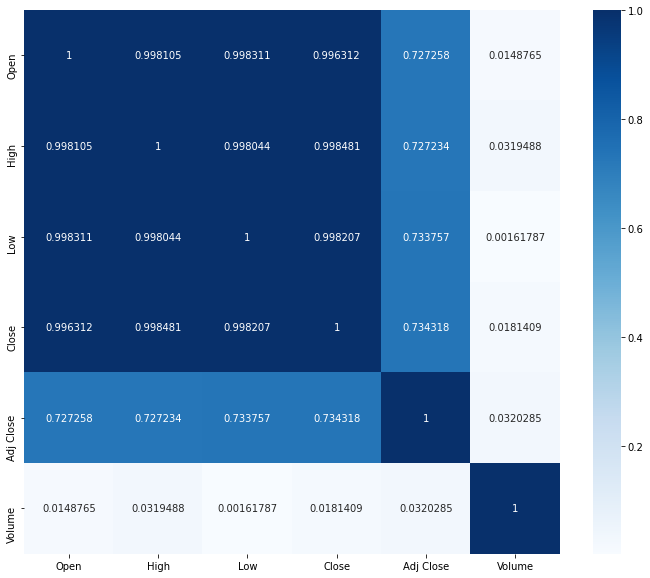

In [12]:
# Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True,cmap='Blues', fmt='g')
plt.show()

In [13]:

#Correlation with output variable
cor_target = abs(cor["Open"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.5]
print(relevant_features)


Open         1.000000
High         0.998105
Low          0.998311
Close        0.996312
Adj Close    0.727258
Name: Open, dtype: float64


We use > 0.8 to filter those highly correlated attribute against Open price.   
***High, Low and Close*** are the 3 attributes which is highly correlated to ***Open price***.

So we can choose this 4 features as the input.


## Section 5: Model Engineering

### Model

Long Short-Term Memory (LSTM) will be used.  
The networks are designed for sequence prediction problems.   

Many-to-One Model is used. A many-to-one model produces one output value after receiving multiple input values.   
Our model will have 4 input (Open, High, Low and Close) and 1 output (Open price).   

Losss function and optimizer used will be loss='mae', optimizer='adam'.   

Mean Absolute Error (MAE)
Measures average/mean squared error of our predictions.

Some advantages of Adam include:
Relatively low memory requirements (though higher than gradient descent and gradient descent with momentum).
Usually works well even with a little tuning of hyperparameters (except alpha).

Details of the model is in section 7, under the train method.

### Hyperparameters

In this project the i will not focus on the turing of hyperparamters.   
I will fix the hidden layer as 1 and the hidden layer nodes is (4 x input).

The learning rate will keep with keras default value.

### Data for training, test and validation

A data is divided into train and test set.  
50% train and 50% test.
In practice test set should be different from validation set.  
But because of the size of data set. Test and validation will use the same set.

## Section 6: Evalution metric

The mertic use for measure the accuracy will be Root Mean Square Error (RMSE).   
Choosen because it is simple and easy to understand.

## Section 7: Define the code and training model

### Define function(s)

In [14]:
## define the function training, adapt from machinelearningmastery.com
## Input is the number of lag (time-step)
def train(n):
    
    # specify the number of lag (days) since our time step is days
    n_days = n
    n_features =  len(selected_columns) 
    n_hidden_node = 4 * n_features
    # frame as supervised learning
    reframed = series_to_supervised(scaled, n_days, 1)

    #rows, reframed_columns = reframed.shape
    #print(reframed_columns)

    # split into train and test sets
    values = reframed.values

    # use 50 % of data set
    n_train_days = selected_data.shape[0]//2
    train = values[:n_train_days, :]
    test = values[n_train_days:, :]
    
    reframed.head(2)
    
    # split into input and outputs
    n_obs = n_days * n_features
    print(n_obs)
    train_X, train_y = train[:, :n_obs], train[:, -n_features]
    test_X, test_y = test[:, :n_obs], test[:, -n_features]
    ##print(train_X.shape, len(train_X), train_y.shape)
    
    
    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], n_days, n_features))
    test_X = test_X.reshape((test_X.shape[0], n_days, n_features))
    
    
    # design network
    model = Sequential()
    model.add(LSTM(n_hidden_node, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    model.summary()
    
    # fit network
    history = model.fit(train_X, train_y, epochs=80, batch_size=50, validation_data=(test_X, test_y), verbose=2, shuffle=False)
     
    # make a prediction
    yhat = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], n_days*n_features))

    # invert scaling for forecast
    inv_yhat = concatenate((yhat, test_X[:, -(n_features-1):]), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]
    
    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = concatenate((test_y, test_X[:, -(n_features-1):]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]
    
    # calculate RMSE
    rmse_n = sqrt(mean_squared_error(inv_y, inv_yhat))
   
    
    return rmse_n,history,inv_y,inv_yhat
       

In [15]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [16]:
## Define the function to display the training summary and prediction result
def summary(time_step , rmse , history ,real_price , predicted_price):
    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

    print('Evaluation result for %s time-step (measure in RMSE): %.3f' % (time_step , rmse))

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(real_price,color='red', label='Real Singtel Stock Price')
    ax.plot(predicted_price ,color='blue', label='Predicted Singtel Stock Price')
    plt.xlabel('Time')
    plt.ylabel('SingTel Stock Price')
    ax.legend()
    plt.title('Singtel Stock Price Prediction')
    plt.show()
    

In [17]:
## Display the available columns names
print(data.columns)

## from the available column, choose which column to use base on the feature selection
## The target attribute has to be the first column
selected_columns = ['Open', 'High', 'Low', 'Close','Adj Close']

## make a copy of the selected data
selected_data = data[selected_columns].copy()

print(selected_data.head())  

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
   Open  High   Low  Close  Adj Close
0  3.91  3.94  3.90   3.91   3.013353
1  3.89  3.89  3.87   3.89   2.997940
2  3.89  3.90  3.86   3.87   2.982526
3  3.89  3.94  3.88   3.94   3.036473
4  3.95  3.97  3.92   3.93   3.028767


### Scaling of data set

In [18]:
values = selected_data.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [19]:
# Store the training data to be use for analysis of result
result_history = []

# Set the timestep for this run
time_step_list = [1,3,5,10,20,30]

# Train the model
for time_step in time_step_list:
    rmse, history, real_price, predicted_price = train(time_step)

    # Store the result into a list
    result_history.append((time_step, rmse, history, real_price, predicted_price))


5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 2,101
Trainable params: 2,101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
13/13 - 0s - loss: 0.4683 - val_loss: 0.1886
Epoch 2/80
13/13 - 0s - loss: 0.3398 - val_loss: 0.1045
Epoch 3/80
13/13 - 0s - loss: 0.2043 - val_loss: 0.0544
Epoch 4/80
13/13 - 0s - loss: 0.0712 - val_loss: 0.0930
Epoch 5/80
13/13 - 0s - loss: 0.0381 - val_loss: 0.0951
Epoch 6/80
13/13 - 0s - loss: 0.0260 - val_loss: 0.0693
Epoch 7/80
13/13 - 0s - loss: 0.0312 - val_loss: 0.0744
Epoch 8/80
13/13 - 0s - loss: 0.0284 - val_loss: 0.0735
Epoch 9/80
13/13 - 0s - loss: 0.0261 - val_loss: 0.0680
Epoch 10/8

Epoch 44/80
13/13 - 0s - loss: 0.0188 - val_loss: 0.0284
Epoch 45/80
13/13 - 0s - loss: 0.0188 - val_loss: 0.0285
Epoch 46/80
13/13 - 0s - loss: 0.0188 - val_loss: 0.0287
Epoch 47/80
13/13 - 0s - loss: 0.0188 - val_loss: 0.0284
Epoch 48/80
13/13 - 0s - loss: 0.0189 - val_loss: 0.0278
Epoch 49/80
13/13 - 0s - loss: 0.0189 - val_loss: 0.0279
Epoch 50/80
13/13 - 0s - loss: 0.0188 - val_loss: 0.0275
Epoch 51/80
13/13 - 0s - loss: 0.0187 - val_loss: 0.0274
Epoch 52/80
13/13 - 0s - loss: 0.0187 - val_loss: 0.0276
Epoch 53/80
13/13 - 0s - loss: 0.0186 - val_loss: 0.0278
Epoch 54/80
13/13 - 0s - loss: 0.0185 - val_loss: 0.0283
Epoch 55/80
13/13 - 0s - loss: 0.0184 - val_loss: 0.0285
Epoch 56/80
13/13 - 0s - loss: 0.0184 - val_loss: 0.0286
Epoch 57/80
13/13 - 0s - loss: 0.0184 - val_loss: 0.0288
Epoch 58/80
13/13 - 0s - loss: 0.0184 - val_loss: 0.0283
Epoch 59/80
13/13 - 0s - loss: 0.0185 - val_loss: 0.0280
Epoch 60/80
13/13 - 0s - loss: 0.0185 - val_loss: 0.0276
Epoch 61/80
13/13 - 0s - loss: 

13/13 - 0s - loss: 0.0502 - val_loss: 0.0763
Epoch 7/80
13/13 - 0s - loss: 0.0457 - val_loss: 0.0612
Epoch 8/80
13/13 - 0s - loss: 0.0442 - val_loss: 0.0600
Epoch 9/80
13/13 - 0s - loss: 0.0394 - val_loss: 0.0468
Epoch 10/80
13/13 - 0s - loss: 0.0389 - val_loss: 0.0419
Epoch 11/80
13/13 - 0s - loss: 0.0364 - val_loss: 0.0369
Epoch 12/80
13/13 - 0s - loss: 0.0344 - val_loss: 0.0318
Epoch 13/80
13/13 - 0s - loss: 0.0332 - val_loss: 0.0289
Epoch 14/80
13/13 - 0s - loss: 0.0315 - val_loss: 0.0277
Epoch 15/80
13/13 - 0s - loss: 0.0303 - val_loss: 0.0265
Epoch 16/80
13/13 - 0s - loss: 0.0298 - val_loss: 0.0263
Epoch 17/80
13/13 - 0s - loss: 0.0292 - val_loss: 0.0269
Epoch 18/80
13/13 - 0s - loss: 0.0289 - val_loss: 0.0279
Epoch 19/80
13/13 - 0s - loss: 0.0288 - val_loss: 0.0283
Epoch 20/80
13/13 - 0s - loss: 0.0283 - val_loss: 0.0289
Epoch 21/80
13/13 - 0s - loss: 0.0279 - val_loss: 0.0286
Epoch 22/80
13/13 - 0s - loss: 0.0277 - val_loss: 0.0286
Epoch 23/80
13/13 - 0s - loss: 0.0276 - val_lo

Epoch 60/80
13/13 - 0s - loss: 0.0219 - val_loss: 0.0150
Epoch 61/80
13/13 - 0s - loss: 0.0231 - val_loss: 0.0146
Epoch 62/80
13/13 - 0s - loss: 0.0262 - val_loss: 0.0169
Epoch 63/80
13/13 - 0s - loss: 0.0316 - val_loss: 0.0185
Epoch 64/80
13/13 - 0s - loss: 0.0326 - val_loss: 0.0157
Epoch 65/80
13/13 - 0s - loss: 0.0210 - val_loss: 0.0170
Epoch 66/80
13/13 - 0s - loss: 0.0192 - val_loss: 0.0160
Epoch 67/80
13/13 - 0s - loss: 0.0227 - val_loss: 0.0157
Epoch 68/80
13/13 - 0s - loss: 0.0261 - val_loss: 0.0147
Epoch 69/80
13/13 - 0s - loss: 0.0232 - val_loss: 0.0144
Epoch 70/80
13/13 - 0s - loss: 0.0192 - val_loss: 0.0143
Epoch 71/80
13/13 - 0s - loss: 0.0173 - val_loss: 0.0142
Epoch 72/80
13/13 - 0s - loss: 0.0171 - val_loss: 0.0145
Epoch 73/80
13/13 - 0s - loss: 0.0188 - val_loss: 0.0152
Epoch 74/80
13/13 - 0s - loss: 0.0197 - val_loss: 0.0168
Epoch 75/80
13/13 - 0s - loss: 0.0202 - val_loss: 0.0173
Epoch 76/80
13/13 - 0s - loss: 0.0188 - val_loss: 0.0181
Epoch 77/80
13/13 - 0s - loss: 

## Section 8: Observations and analysis

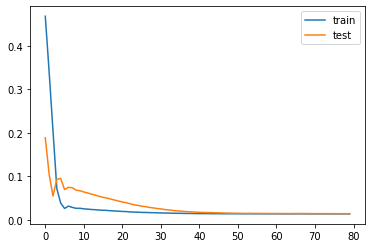

Evaluation result for 1 time-step (measure in RMSE): 0.032


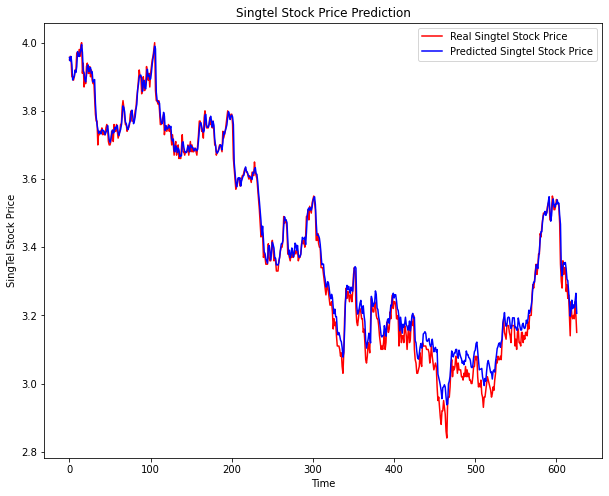

None

In [20]:
    # result for next timestep 1
    result = result_history[0]
    # time_step = 0 , rmse = 1 , history = 2 , real_price = 3 , predicted_price = 4
    display(summary(result[0] , result[1] , result[2] ,result[3] , result[4]))

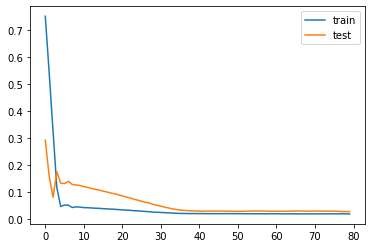

Evaluation result for 3 time-step (measure in RMSE): 0.060


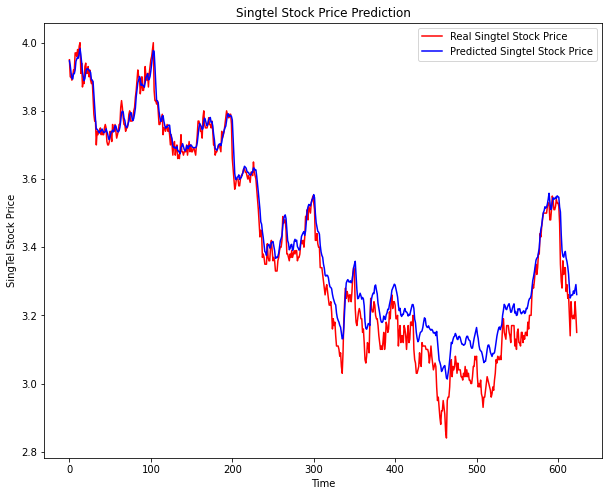

None

In [21]:
    # result for next timestep 3
    result = result_history[1]
    # time_step = 0 , rmse = 1 , history = 2 , real_price = 3 , predicted_price = 4
    display(summary(result[0] , result[1] , result[2] ,result[3] , result[4]))

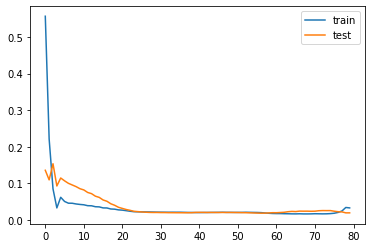

Evaluation result for 5 time-step (measure in RMSE): 0.044


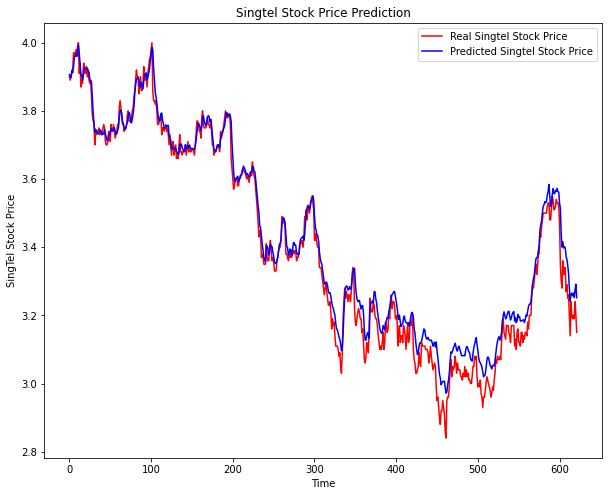

None

In [22]:
    # result for next timestep 5
    result = result_history[2]
    # time_step = 0 , rmse = 1 , history = 2 , real_price = 3 , predicted_price = 4
    display(summary(result[0] , result[1] , result[2] ,result[3] , result[4]))

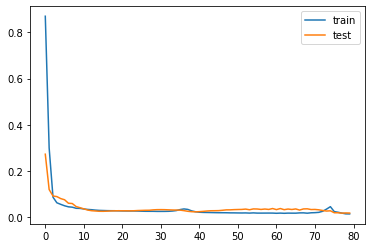

Evaluation result for 10 time-step (measure in RMSE): 0.044


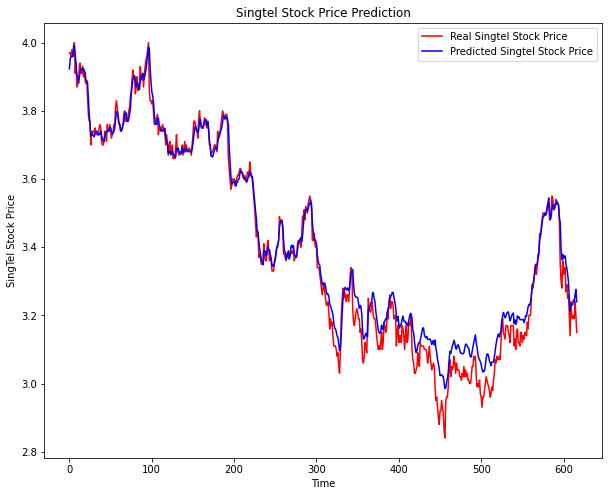

None

In [23]:
    # result for next timestep 10
    result = result_history[3]
    # time_step = 0 , rmse = 1 , history = 2 , real_price = 3 , predicted_price = 4
    display(summary(result[0] , result[1] , result[2] ,result[3] , result[4]))

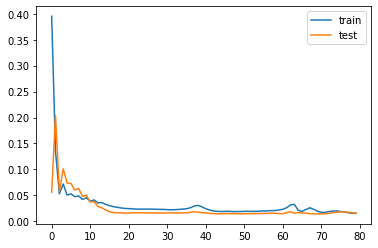

Evaluation result for 20 time-step (measure in RMSE): 0.036


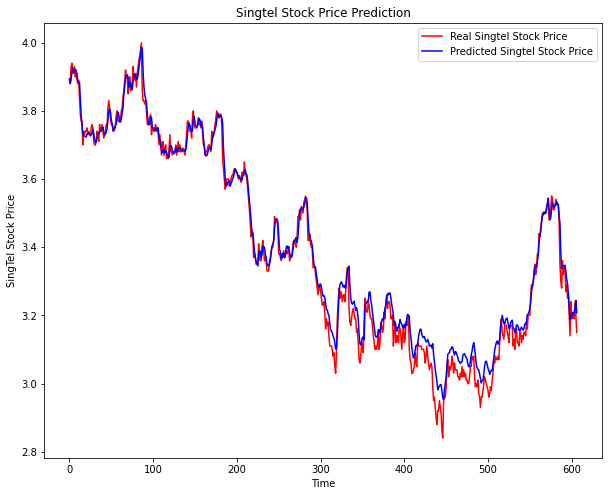

None

In [24]:
    # result for next timestep 20
    result = result_history[4]
    # time_step = 0 , rmse = 1 , history = 2 , real_price = 3 , predicted_price = 4
    display(summary(result[0] , result[1] , result[2] ,result[3] , result[4]))

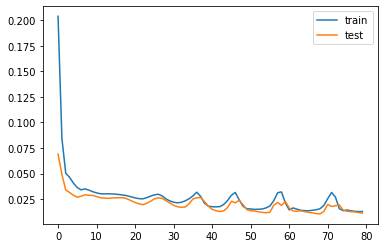

Evaluation result for 30 time-step (measure in RMSE): 0.027


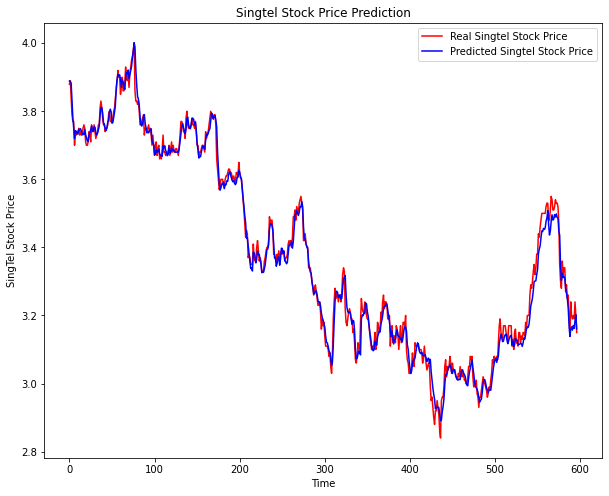

None

In [25]:
    # result for next timestep 30
    result = result_history[5]
    # time_step = 0 , rmse = 1 , history = 2 , real_price = 3 , predicted_price = 4
    display(summary(result[0] , result[1] , result[2] ,result[3] , result[4]))

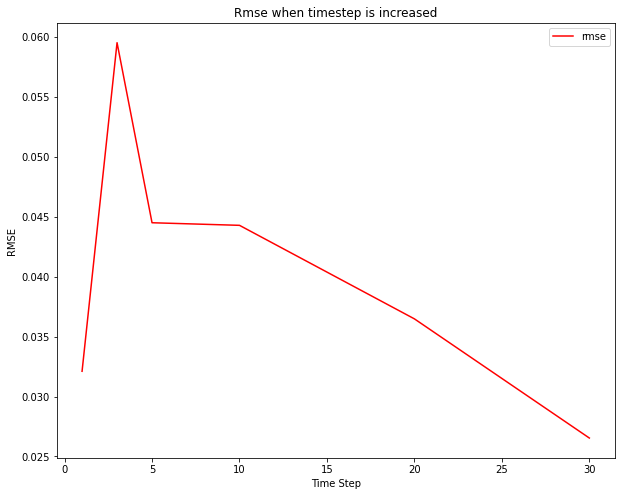

In [26]:
    rmse_results = []
    for hist in result_history:
        # rmse is store in index 1
        rmse_results.append(hist[1])
    
    x_axis_array = [1,3,5,10,20,30]
   
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(x_axis_array, rmse_results,color='red', label='rmse')
    plt.xlabel('Time Step')
    plt.ylabel('RMSE')
    ax.legend()
    plt.title('Rmse when timestep is increased')
    plt.show()

The experiment use timestep of [1,3,5,10,20,30].   
With time-step > 1 (day) does improve the accuracy of the model improved, although not a lot.    
Probably because the rmse is quite small even with 1 time-step.

From the graph above we can see that having a time-step > 1 does help to improve the accuracy of the prediction against the validation set.  


### Possible improvement

Future improvement might be possible by turning the LSTM model by adding more hidden layer and its hyperparamters.